## **OBJETIVO**


Encontrar clusters de carros bajo ciertas atributos que los definen

## **Proyecto**

**CONEXIÓN**

In [ ]:
from google.colab import drive
# You''l be asked for a code, select the account with the downloaded data sets.
drive.mount('/content/drive',  force_remount=True)  

# Use next line if you mounted the wrong drive
# drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [ ]:
carsData = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/Cars/Cars_limpio.csv', encoding='iso8859-1')

### **TIPOS DE DATOS**

Solamente hay un string y es el nombre del carro, El modelo parece indicar año y es un INT, El origen parece ser una categoría INT por lo que debe haber un diccionario para saber el dato en texto. El resto son datos cuantitativos.

In [ ]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           193 non-null    float64
 1   cylinders     193 non-null    int64  
 2   displacement  193 non-null    int64  
 3   horsepower    193 non-null    int64  
 4   weight        193 non-null    int64  
 5   acceleration  193 non-null    float64
 6   model         193 non-null    int64  
 7   origin        193 non-null    int64  
 8   car           193 non-null    object 
 9   data1         0 non-null      float64
 10  data2         0 non-null      float64
dtypes: float64(4), int64(6), object(1)
memory usage: 16.7+ KB


In [ ]:
carsData.shape

(193, 11)

In [ ]:
carsData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,data1,data2
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,0.0,0.0
mean,19.650259,5.917098,224.808290,116.487047,3191.284974,14.946114,72.839378,1.440415,NaN,NaN
std,5.803933,1.786339,115.259443,43.539626,932.890488,2.850036,1.873639,0.705502,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN
25%,15.000000,4.000000,114.000000,86.000000,2310.000000,13.000000,71.000000,1.000000,NaN,NaN
50%,19.000000,6.000000,231.000000,100.000000,3085.000000,14.900000,73.000000,1.000000,NaN,NaN
75%,24.000000,8.000000,318.000000,150.000000,4082.000000,16.500000,74.000000,2.000000,NaN,NaN
max,35.000000,8.000000,455.000000,230.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN


In [ ]:
carsData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN


In [ ]:
carsData.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,data1,data2
188,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN
189,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN
190,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN
191,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN
192,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN


In [ ]:
carsDataSliced = carsData.select_dtypes(include=['number']) 
scaler = MinMaxScaler() 
rescaledCarsData = pd.DataFrame(scaler.fit_transform(carsDataSliced))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
rescaledCarsData

,0,1,2,3,4,5,6,7,8,9
0,0.346154,1.0,0.617571,0.456522,0.536150,0.258065,0.0,0.0,NaN,NaN
1,0.230769,1.0,0.728682,0.646739,0.589736,0.225806,0.0,0.0,NaN,NaN
2,0.346154,1.0,0.645995,0.565217,0.516870,0.193548,0.0,0.0,NaN,NaN
3,0.269231,1.0,0.609819,0.565217,0.516019,0.258065,0.0,0.0,NaN,NaN
4,0.307692,1.0,0.604651,0.510870,0.520556,0.161290,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
188,0.576923,0.6,0.341085,0.190217,0.396654,0.619355,1.0,0.0,NaN,NaN
189,0.519231,0.6,0.423773,0.239130,0.417352,0.619355,1.0,0.0,NaN,NaN
190,0.769231,0.2,0.043928,0.032609,0.119648,0.916129,1.0,0.0,NaN,NaN
191,0.596154,0.2,0.077519,0.076087,0.156223,0.909677,1.0,0.0,NaN,NaN


## **HORSEPOWER AND ACCELERATION**

In [ ]:
pairOne = rescaledCarsData.iloc[:, [3, 5]].values   #Horsepower and acceleration
pairOne

array([[0.45652174, 0.25806452],
       [0.64673913, 0.22580645],
       [0.56521739, 0.19354839],
       [0.56521739, 0.25806452],
       [0.51086957, 0.16129032],
       [0.82608696, 0.12903226],
       [0.94565217, 0.06451613],
       [0.91847826, 0.03225806],
       [0.97282609, 0.12903226],
       [0.7826087 , 0.03225806],
       [0.67391304, 0.12903226],
       [0.61956522, 0.        ],
       [0.56521739, 0.09677419],
       [0.97282609, 0.12903226],
       [0.26630435, 0.4516129 ],
       [0.26630435, 0.48387097],
       [0.27717391, 0.48387097],
       [0.21195652, 0.51612903],
       [0.22826087, 0.41935484],
       [0.        , 0.80645161],
       [0.22282609, 0.61290323],
       [0.23913043, 0.41935484],
       [0.26630435, 0.61290323],
       [0.36413043, 0.29032258],
       [0.23913043, 0.4516129 ],
       [0.91847826, 0.38709677],
       [0.83695652, 0.4516129 ],
       [0.89130435, 0.35483871],
       [0.79891304, 0.67741935],
       [0.22826087, 0.41935484],
       [0.

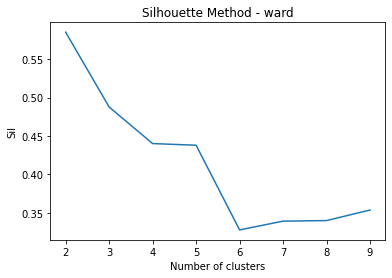

2:0.5850054018231695
3:0.4876980290362463
4:0.44015744509485255
5:0.4379992739526773
6:0.3278048477198021
7:0.33921587266935416
8:0.3399577314506727
9:0.35372512603510586


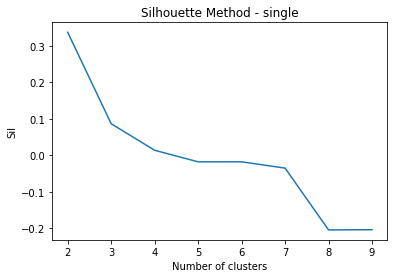

2:0.3373038438720511
3:0.0866694302569037
4:0.013874188558395983
5:-0.017740626669318093
6:-0.017711680674531542
7:-0.03500529310296782
8:-0.2043742416105477
9:-0.2037884465333718


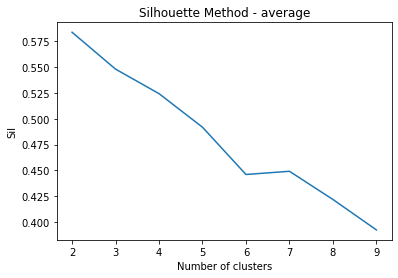

2:0.5833987633169501
3:0.5478336032123621
4:0.524153857490824
5:0.4917679926378139
6:0.4461437513002337
7:0.44923292462642367
8:0.42203040646522794
9:0.3926567601143498


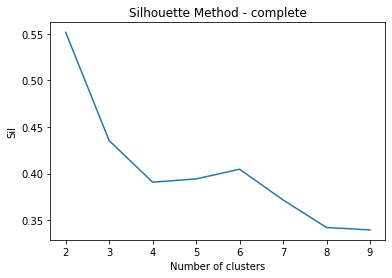

2:0.5518089865405328
3:0.43539898942018157
4:0.39065713326602036
5:0.3942139916022244
6:0.4045784515364514
7:0.37161105716187204
8:0.341969975846107
9:0.3393870853626971


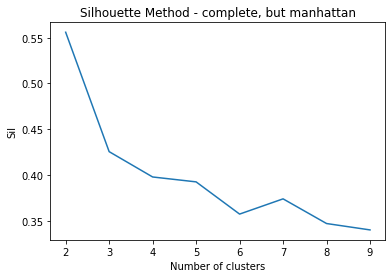

2:0.556037177371791
3:0.42548112512933695
4:0.3977926715715758
5:0.3924327414594081
6:0.3572121803175209
7:0.37386171073942726
8:0.34689021920812046
9:0.33990583798822216


In [ ]:
from sklearn.metrics import silhouette_score

sil1 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward').fit(pairOne)  
  preds = cluster.fit_predict(pairOne)
  sil1.append(silhouette_score(pairOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil1)
plt.title('Silhouette Method - ward')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil1)):
 print(str(i+2) +":"+ str(sil1[i]))

sil2 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='single').fit(pairOne)  
  preds = cluster.fit_predict(pairOne)
  sil2.append(silhouette_score(pairOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil2)
plt.title('Silhouette Method - single')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil2)):
 print(str(i+2) +":"+ str(sil2[i]))

sil3 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='average').fit(pairOne)  
  preds = cluster.fit_predict(pairOne)
  sil3.append(silhouette_score(pairOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil3)
plt.title('Silhouette Method - average')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil3)):
 print(str(i+2) +":"+ str(sil3[i]))

sil4 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='complete').fit(pairOne)  
  preds = cluster.fit_predict(pairOne)
  sil4.append(silhouette_score(pairOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil4)
plt.title('Silhouette Method - complete')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil4)):
 print(str(i+2) +":"+ str(sil4[i]))

sil5 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='manhattan', linkage='complete').fit(pairOne)  
  preds = cluster.fit_predict(pairOne)
  sil5.append(silhouette_score(pairOne, preds, metric = 'manhattan'))

plt.plot(range(2, 10), sil5)
plt.title('Silhouette Method - complete, but manhattan')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil5)):
 print(str(i+2) +":"+ str(sil5[i]))

Si bien los 4 tipos de enlace muestran que las variables seleccionadas tienen 2 clusters, el modelo que mejor, por aprox 3 centésimas (.03), hace que los elementos de un cluster estén más cercanos al resto es que tiene afinidad euclidiana y de enlace "ward". El resto tiene aproximadamente el mismo valor de silhoutte, que recordemos representa la cohesión entre los elementos de un cluster. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusterWard = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusterWard.fit_predict(pairOne)

clusterSingle = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
clusterSingle.fit_predict(pairOne)

clusterAverage = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clusterAverage.fit_predict(pairOne)

clusterComplete = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clusterComplete.fit_predict(pairOne)

clusterCompleteManhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
clusterCompleteManhattan.fit_predict(pairOne)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Acceleration')

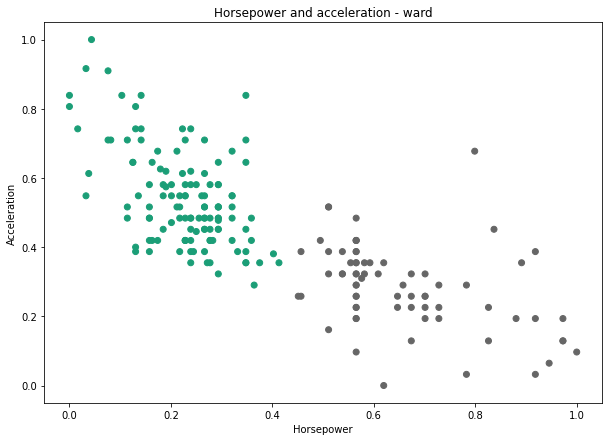

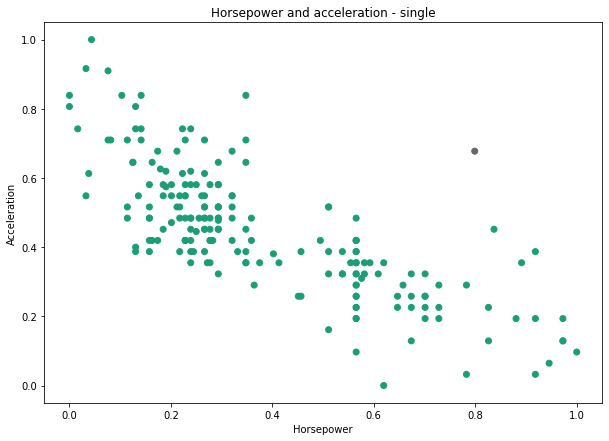

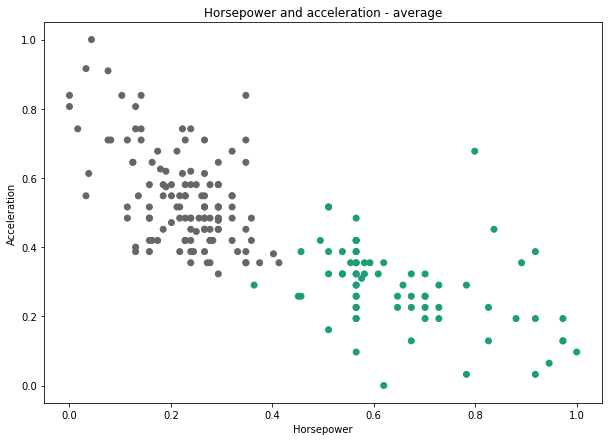

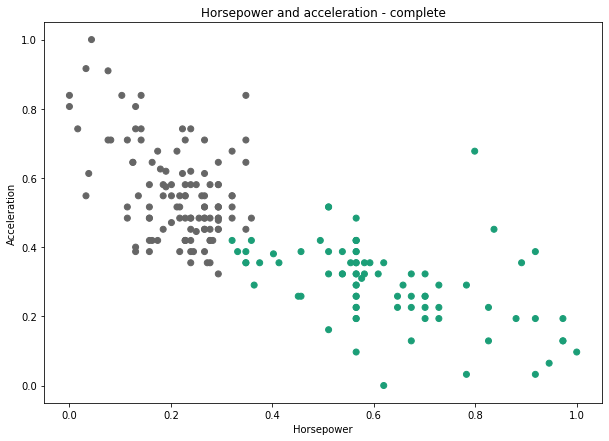

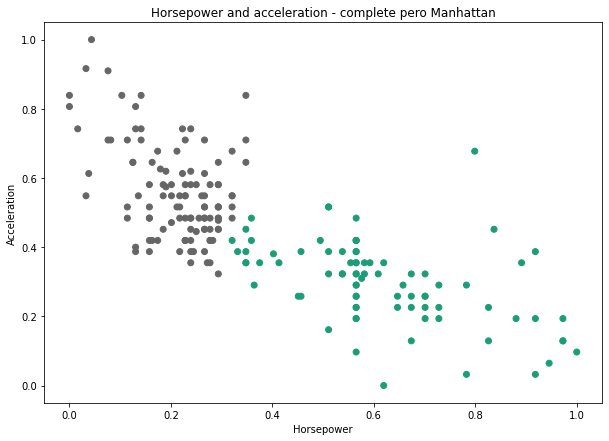

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pairOne[:,0], pairOne[:,1], c=clusterWard.labels_, cmap='Dark2')
plt.title('Horsepower and acceleration - ward')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')

plt.figure(figsize=(10, 7))
plt.scatter(pairOne[:,0], pairOne[:,1], c=clusterSingle.labels_, cmap='Dark2')
plt.title('Horsepower and acceleration - single')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')

plt.figure(figsize=(10, 7))
plt.scatter(pairOne[:,0], pairOne[:,1], c=clusterAverage.labels_, cmap='Dark2')
plt.title('Horsepower and acceleration - average')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')

plt.figure(figsize=(10, 7))
plt.scatter(pairOne[:,0], pairOne[:,1], c=clusterComplete.labels_, cmap='Dark2')
plt.title('Horsepower and acceleration - complete')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')

plt.figure(figsize=(10, 7))
plt.scatter(pairOne[:,0], pairOne[:,1], c=clusterCompleteManhattan.labels_, cmap='Dark2')
plt.title('Horsepower and acceleration - complete pero Manhattan')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')

**1) Ward**

    Este fue la mejor opción es el que mejor marca la diferencia entre los dos clusters.  Haciendo una buena separación en el cuando Horsepower = 0.4. 

**2) Single**

    Este fue el modelo más raro, agrupó todo como verde y solo dejó un círculo como gris. 

**3) Average**

    Este modelo es el que tiene una mayor cercanía al mejor modelo, este bien marca la diferencia entre los clusters, donde visualmente hace sentido.

**4) Complete**

    Este modelo si bien también genera dos clusters, se ve como el segundo cluster (verde) empieza a tocar lo que visualmente sería el primer cluster (gris)

**5) Manhattan**

    Este modelo si bien también genera dos clusters, se ve como el segundo cluster (verde) empieza a tocar lo que visualmente sería el primer cluster (gris), un poco más que el complete con afinidad euclidiana.

A excepción del modelo de enlace "single", todos generan clusters muy similares entre sí donde están los que tienen muchos caballos de fuerza, pero una aceleración baja, luego está el grupo con pocos caballos de fuerza pero alta aceleración.

La utilidad de negocio sería, que hay automovilistas que les gusta armar carros por partes, por lo que podrían aprovechar este diagrama para vender las partes de los carros por los clusters que se salieron, mucho caballos de fuerza suena a que son camiones de carga, por lo que puede servir para luego agrupar los motores y piezas, facilitando venderle a un segmento de mercado.

In [ ]:
tripletOne = rescaledCarsData.iloc[:, [0, 1, 2]].values   #MPG, Cylinders and Displacement
tripletOne

array([[0.34615385, 1.        , 0.61757106],
       [0.23076923, 1.        , 0.72868217],
       [0.34615385, 1.        , 0.64599483],
       [0.26923077, 1.        , 0.60981912],
       [0.30769231, 1.        , 0.60465116],
       [0.23076923, 1.        , 0.93281654],
       [0.19230769, 1.        , 0.99741602],
       [0.19230769, 1.        , 0.96124031],
       [0.19230769, 1.        , 1.        ],
       [0.23076923, 1.        , 0.83204134],
       [0.23076923, 1.        , 0.81395349],
       [0.19230769, 1.        , 0.70284238],
       [0.23076923, 1.        , 0.85788114],
       [0.19230769, 1.        , 1.        ],
       [0.57692308, 0.2       , 0.11627907],
       [0.5       , 0.6       , 0.33591731],
       [0.34615385, 0.6       , 0.33850129],
       [0.46153846, 0.6       , 0.34108527],
       [0.69230769, 0.2       , 0.0749354 ],
       [0.65384615, 0.2       , 0.0749354 ],
       [0.61538462, 0.2       , 0.10852713],
       [0.57692308, 0.2       , 0.10077519],
       [0.

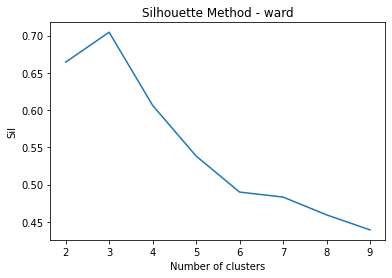

2:0.6644563829034738
3:0.7045671816620174
4:0.6063384649000407
5:0.5384056841179502
6:0.4900020593458281
7:0.48329426108789825
8:0.45943485514054927
9:0.43920013937764946


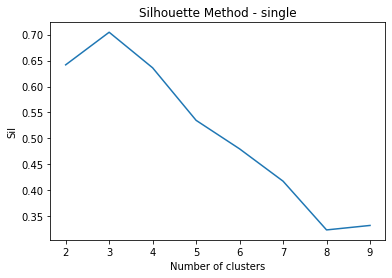

2:0.6417437118792885
3:0.7045671816620174
4:0.636012657969161
5:0.5348046053409191
6:0.4798220953826927
7:0.41756850478219326
8:0.3236551375058236
9:0.3322751378156006


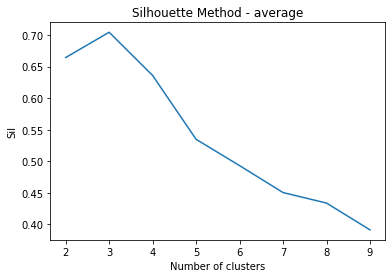

2:0.6644563829034738
3:0.7045671816620174
4:0.636012657969161
5:0.5348046053409191
6:0.49308675226925314
7:0.450351670768346
8:0.43370119575986243
9:0.39114291029417675


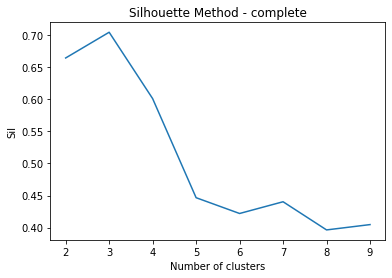

2:0.6644563829034738
3:0.7045671816620174
4:0.6010988037053012
5:0.44661232923860394
6:0.42200019130956756
7:0.4403000379368186
8:0.3963913098761466
9:0.4046907281351992


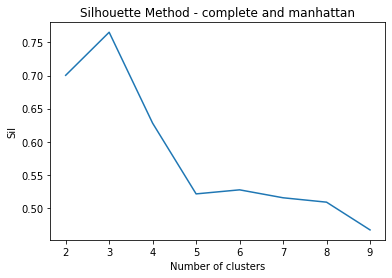

2:0.700313786607777
3:0.765391134261441
4:0.6279572929131242
5:0.521119833271521
6:0.5272449031876317
7:0.5152511658787655
8:0.5086113959724888
9:0.4666787169678834


In [ ]:
from sklearn.metrics import silhouette_score

sil1 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward').fit(tripletOne)  
  preds = cluster.fit_predict(tripletOne)
  sil1.append(silhouette_score(tripletOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil1)
plt.title('Silhouette Method - ward')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil1)):
 print(str(i+2) +":"+ str(sil1[i]))

 
sil2 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='single').fit(tripletOne)  
  preds = cluster.fit_predict(tripletOne)
  sil2.append(silhouette_score(tripletOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil2)
plt.title('Silhouette Method - single')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil2)):
 print(str(i+2) +":"+ str(sil2[i]))

sil3 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='average').fit(tripletOne)  
  preds = cluster.fit_predict(tripletOne)
  sil3.append(silhouette_score(tripletOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil3)
plt.title('Silhouette Method - average')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil3)):
 print(str(i+2) +":"+ str(sil3[i]))



sil4 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='complete').fit(tripletOne)  
  preds = cluster.fit_predict(tripletOne)
  sil4.append(silhouette_score(tripletOne, preds, metric = 'euclidean'))

plt.plot(range(2, 10), sil4)
plt.title('Silhouette Method - complete')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil4)):
 print(str(i+2) +":"+ str(sil4[i]))


sil5 = []
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='manhattan', linkage='complete').fit(tripletOne)  
  preds = cluster.fit_predict(tripletOne)
  sil5.append(silhouette_score(tripletOne, preds, metric = 'manhattan'))

plt.plot(range(2, 10), sil5)
plt.title('Silhouette Method - complete and manhattan')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil5)):
 print(str(i+2) +":"+ str(sil5[i]))


Si bien todos los modelos marcan que los datos tienen una mayor cohesión cuando son 3 grupos, el que representa un mayor valor de silueta es el que usó una afinidad "manhattan" y un enlace "complete". Por aproximadamente 6 (0.06) centésimas, tiene un mejor valor. El resto de los modelos tiene un valor alrededor de 0.06

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusterWard = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusterWard.fit_predict(tripletOne)

clusterSingle = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clusterSingle.fit_predict(tripletOne)

clusterAverage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clusterAverage.fit_predict(tripletOne)

clusterComplete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clusterComplete.fit_predict(tripletOne)

clusterCompleteManhattan = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')
clusterCompleteManhattan.fit_predict(tripletOne)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0])

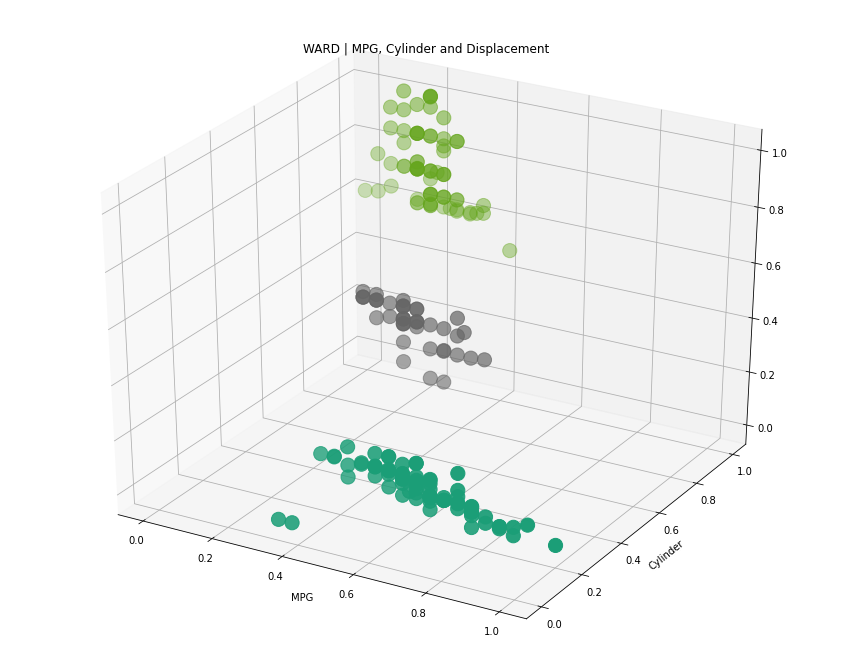

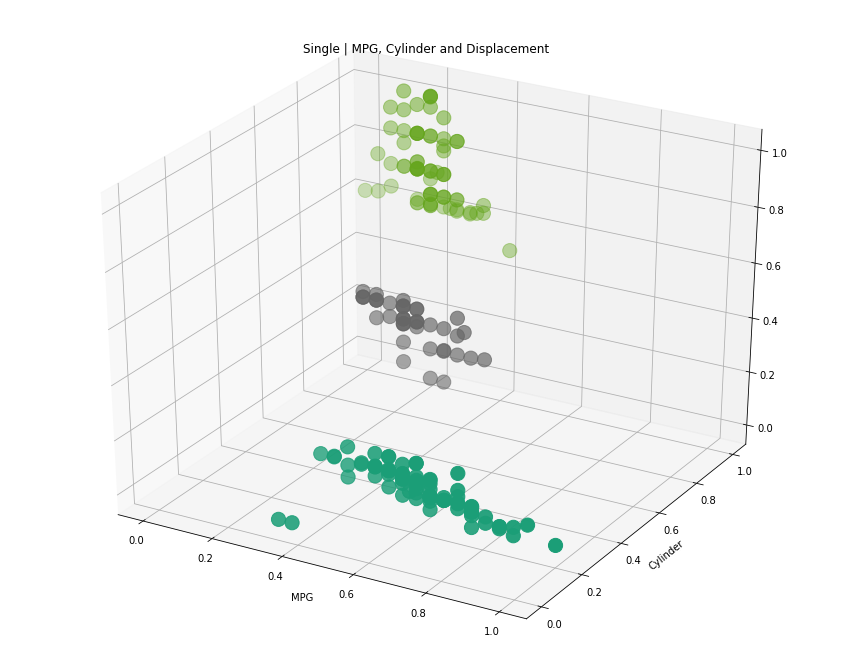

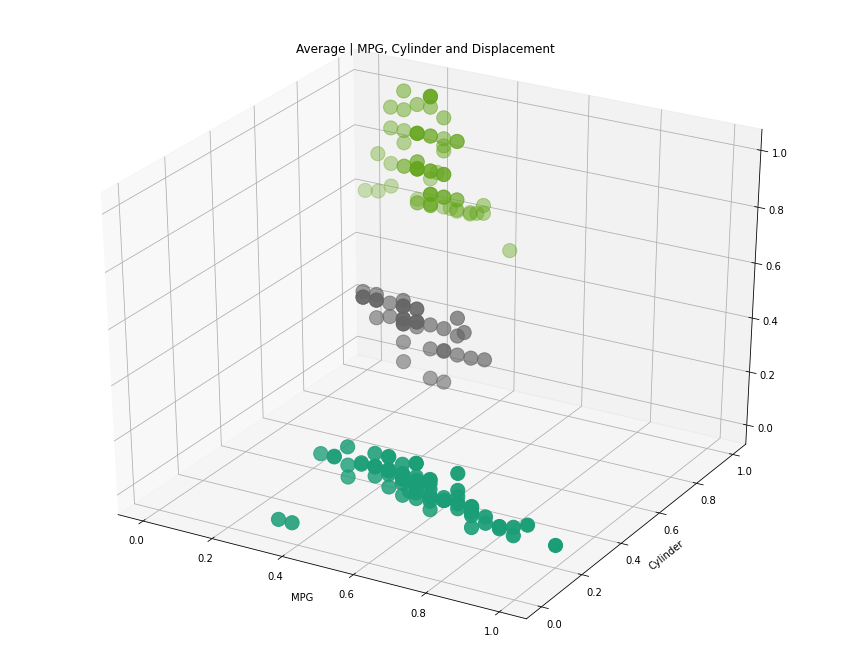

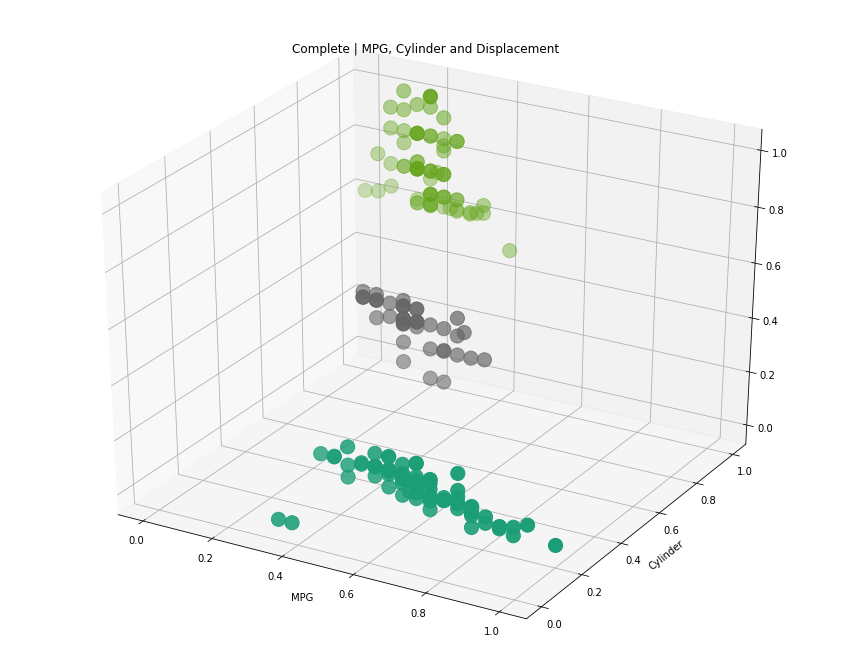

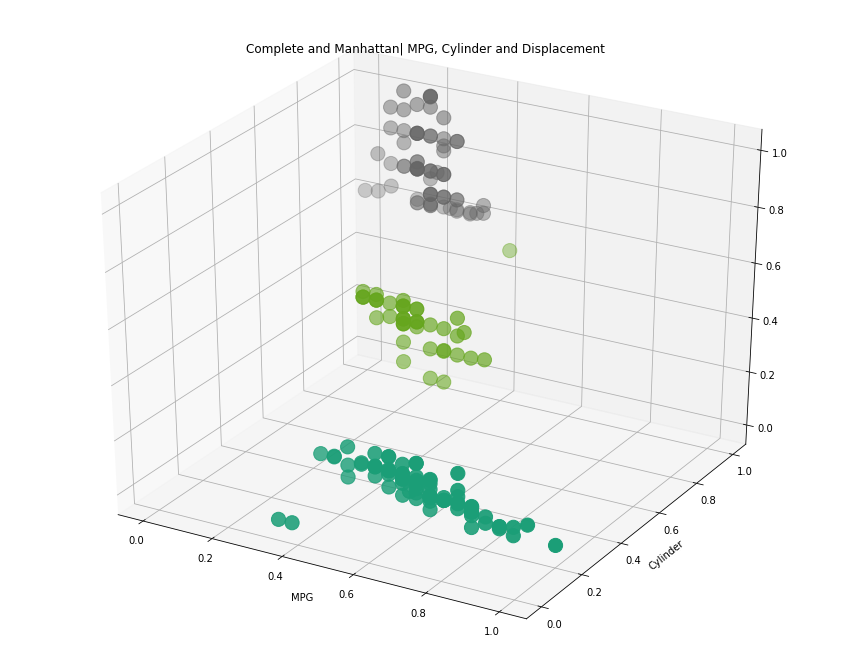

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(tripletOne[:,0], tripletOne[:,1], tripletOne[:,2],  s = 200, c=clusterWard.labels_, cmap='Dark2')
plt.rcParams["figure.figsize"] = (15,12)
plt.title('WARD | MPG, Cylinder and Displacement')
plt.xlabel('MPG')
plt.ylabel('Cylinder')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(tripletOne[:,0], tripletOne[:,1], tripletOne[:,2],  s = 200, c=clusterSingle.labels_, cmap='Dark2')
plt.rcParams["figure.figsize"] = (15,12)
plt.title('Single | MPG, Cylinder and Displacement')
plt.xlabel('MPG')
plt.ylabel('Cylinder')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(tripletOne[:,0], tripletOne[:,1], tripletOne[:,2],  s = 200, c=clusterAverage.labels_, cmap='Dark2')
plt.rcParams["figure.figsize"] = (15,12)
plt.title('Average | MPG, Cylinder and Displacement')
plt.xlabel('MPG')
plt.ylabel('Cylinder')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(tripletOne[:,0], tripletOne[:,1], tripletOne[:,2],  s = 200, c=clusterComplete.labels_, cmap='Dark2')
plt.rcParams["figure.figsize"] = (15,12)
plt.title('Complete | MPG, Cylinder and Displacement')
plt.xlabel('MPG')
plt.ylabel('Cylinder')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(tripletOne[:,0], tripletOne[:,1], tripletOne[:,2],  s = 200, c=clusterCompleteManhattan.labels_, cmap='Dark2')
plt.rcParams["figure.figsize"] = (15,12)
plt.title('Complete and Manhattan| MPG, Cylinder and Displacement')
plt.xlabel('MPG')
plt.ylabel('Cylinder')
plt.show()


**1) Ward, Average, Single***

    Estos tres modelos tienen la mis agrupación entre ellos y el mismo patrón de colores.

**4) Complete**

    Este modelo lo encuentro raro, tiene afinidad "euclidiana", a diferencia del quinto modelo, e invierte el color de los clusters y este si incluye en el grupo de hasta arriba un círculo algo alejado que en el quinto modelo lo absuerve el cluster de en medio. En mi opiniónn este sería el mejor modelo.


**5) Manhattan**

    Si bien este modelo tiene un mejor valor de silueta, el círculo verde más cercano al gris, me hace dudar de su precisión. ¿Ese círculo tendría mayor relación al gris que al verde, pero no lo suficiente para ser gris?

Se generaran 3 clusters, los que tienen poco displacement, poco mpg y pocos cilindros, luego están los que tienen todo promedio y finalmente los que tienen mucho displacement, mucho mpg y muchos cilindros. Esto siento que tiene utilidad de negocio siguiendo el concepto del modelo de 2 variables que serviría para poder orientar mejor las campañas de los carros cuando se interese en vender al nicho de personas que les gusta reconstruir carros o tunearlos. 

## **K MEANS - MODELO 3 VARIABLES**

[51.10515478975025, 11.51867285616177, 3.7418380170248167, 2.788307865703325, 1.945502509171043, 1.6386994412788276, 1.3449758656602682, 1.110947014193339, 0.975566674336277, 0.8809794188610982]


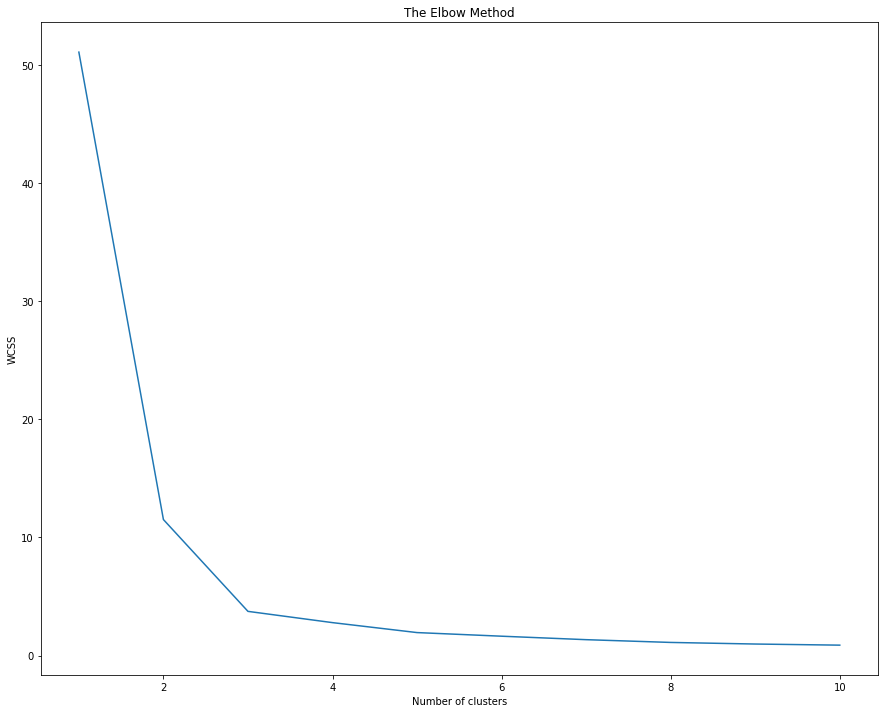

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tripletOne)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method - K Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(tripletOne)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1 1 1 1 1 2 0 0 0 0 1 1 1 2 2 2 2 2
 0 0 0 0 0 0 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 0 0 0 0 2 1 1 1 1 2 1
 0 0 1 1 1 1 0 1 2 0 2 2 2 1 1 1 1 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 0 0 0 0 2 2 2 2 2 0 0 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 2 2 2 2 1 1 1]


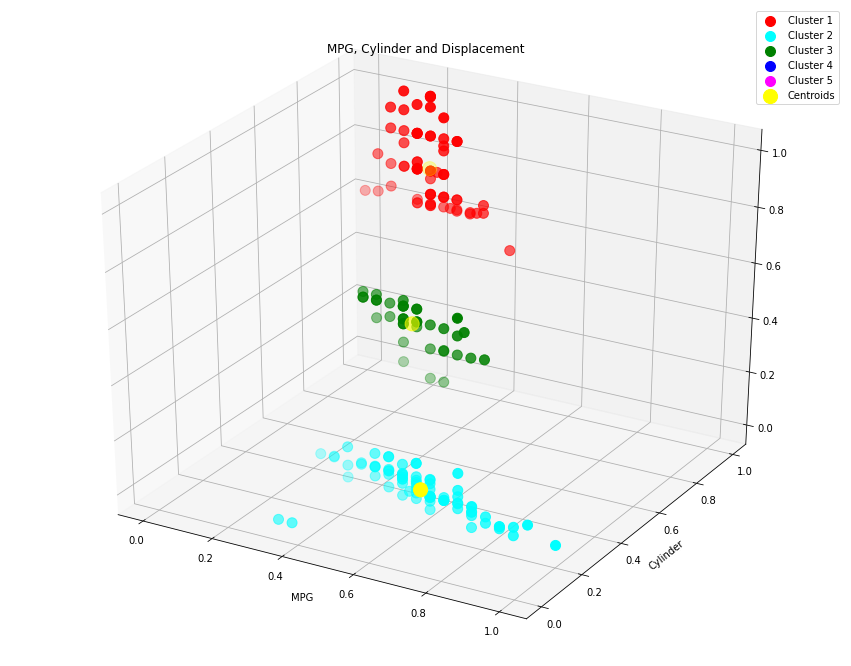

In [ ]:
fig = plt.figure()

# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

col = ['cyan','green','blue','magenta','red']
#Agregamos los puntos
for i in range(0,5):
  x = tripletOne[y_kmeans == i, 0]
  y = tripletOne[y_kmeans == i, 1]
  z = tripletOne[y_kmeans == i, 2]
  clasi = 'Cluster '+str(i+1)
  ax1.scatter(x, y, z, c = col[i-1], s = 100,label = clasi)

# Agregamos los centros
x = kmeans.cluster_centers_[:, 0]
y = kmeans.cluster_centers_[:, 1]
z = kmeans.cluster_centers_[:, 2]
ax1.scatter(x, y, z, c = 'yellow', s = 200, label = 'Centroids')

plt.rcParams["figure.figsize"] = (15,12)
plt.title('MPG, Cylinder and Displacement')
plt.xlabel('MPG')
plt.ylabel('Cylinder')
plt.show()